**Box Plot**
- Box plot is used to identify the $outliers$
- Outliers is an observation having huge positive value or huge nagetive value
- Q1 = 25p , Q2 = 50p ,Q3 = 75p
- IQR = inter quartile range = Q3-Q1
- Q3 + 1.5 * IQR and Q1-1.5*IQR

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
visa = pd.read_csv(r"D:\Study material\Omkar sir\Visadataset.csv")
visa

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


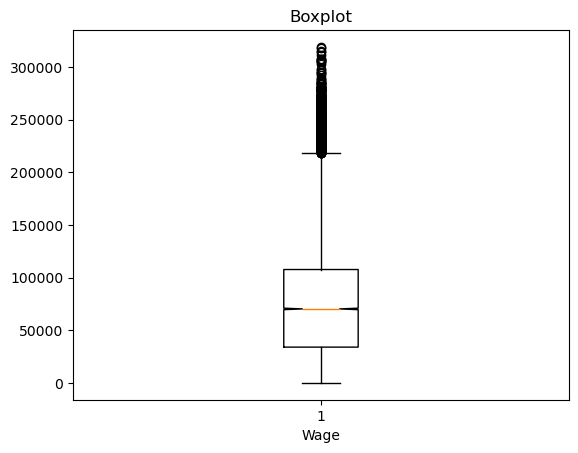

In [3]:
wage_data = visa['prevailing_wage']
plt.boxplot(wage_data,
           notch = True,
            vert = True
           )
plt.title('Boxplot')
plt.xlabel('Wage')
plt.show()

In [4]:
# plot the histogram and box plot side by side

<Figure size 640x480 with 0 Axes>

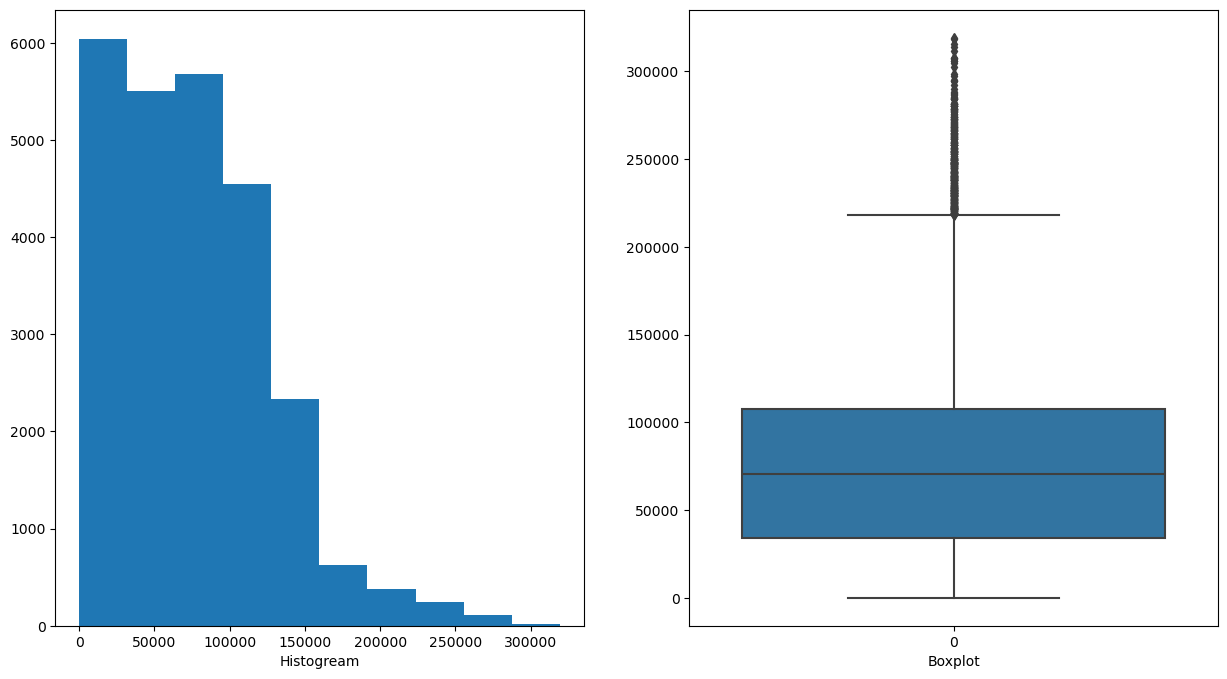

In [5]:
p_wage = visa['prevailing_wage']

plt.suptitle('Comparision of the Histogram with Boxplot')
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
plt.hist(p_wage)
plt.xlabel('Histogream')

plt.subplot(1,2,2)
sns.boxplot(p_wage)
plt.xlabel('Boxplot')
plt.show()

<Figure size 640x480 with 0 Axes>

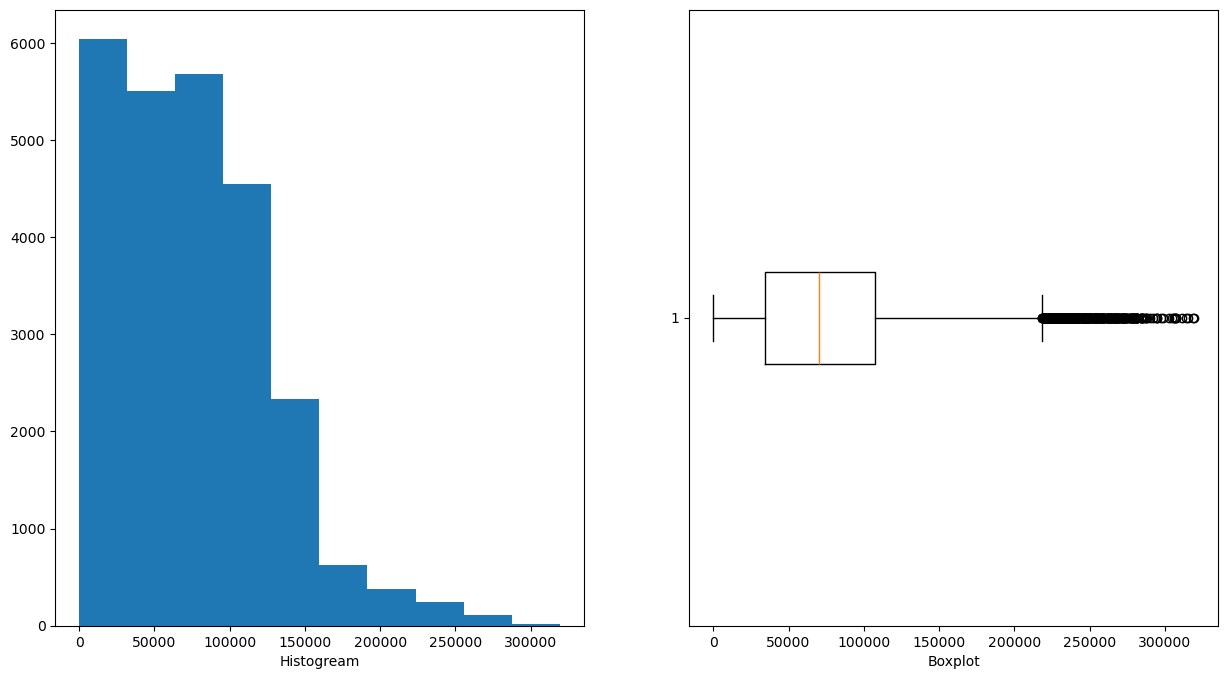

In [6]:
p_wage = visa['prevailing_wage']

plt.suptitle("Comparision of the Histogram with Boxplot")
plt.figure(figsize = (15,8))
plt.subplot(1,2,1).hist(p_wage)

plt.xlabel('Histogream')
plt.subplot(1,2,2).boxplot(p_wage,vert = False)

plt.xlabel('Boxplot')
plt.show()

**Finding the outliers**
- We already know that outlier availble less than Q1-1.5*IQR and Q3+1.5*IQR

- Step-1 :
    - calculate  Q1 = 25p
    - calculate  Q2 = 50p
    - calculate  Q3 = 75p
- Step-2 :
    - calculate IQR = Q3 - Q1
- Step 3 :
    - calculate LB = Q1-1.5*IQR
    - Calculate UB = Q2-1.5*IQR
- Step-4 :
    - con1 = wage data < LB
    - con2 = wage data > UB
    - con3 = con1 or-and con2(use bitwise operator)
- Step-5 :
    data [con3]

    Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

In [7]:
p_wage = visa['prevailing_wage']

# Step-1 : 
q1 = np.percentile(p_wage,25)
q2 = np.percentile(p_wage,50)
q3 = np.percentile(p_wage,75)

# Step-2 : 
IQR = q3 - q1

# Step-3 : 
lb = q1-1.5*IQR 
ub = q3+1.5*IQR

# Step-4 : 
con1 = p_wage < lb
con2 = p_wage > ub
con3 = con1 | con2

outlier_data = visa[con3]
outlier_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [8]:
p_wage = visa['prevailing_wage']

# Step-1 : 
q1 = np.percentile(p_wage,25)
q2 = np.percentile(p_wage,50)
q3 = np.percentile(p_wage,75)

# Step-2 : 
IQR = q3 - q1

# Step-3 : 
lb = q1-1.5*IQR 
ub = q3+1.5*IQR

# Step-4 : 
con1 = p_wage > lb
con2 = p_wage < ub
con3 = con1 & con2

non_outlier_data = visa[con3]
non_outlier_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [9]:
# 

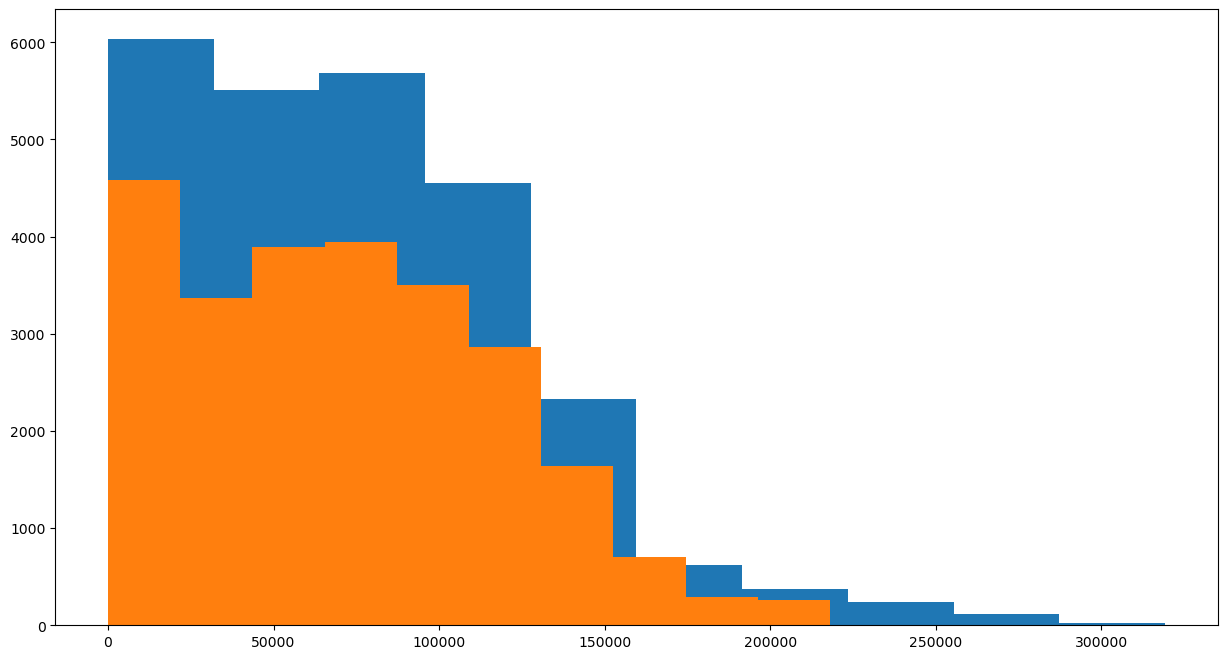

In [10]:
wage_non_outlier_data = non_outlier_data['prevailing_wage']
wage_data = visa['prevailing_wage']

plt.figure(figsize = (15,8))
plt.hist(wage_data)
plt.hist(wage_non_outlier_data)
plt.show()

**How to deal with outliers**

1) We can drop the outliers
    - Droping outliers is an easy task, but not recommended
    - If you drop the outliers we are droping the rows and columns
    - If outliers less than 2% less we can drop the outliers
  
2) Fill with Median value
    - We already know that outliers does not affect by median
    - So it is the best practice to fill the outliers with median
  
3) Capping or florring
    - Instead of fill with median
    - We can fill with certian values
    - The outliers which are less than LB fill with LB values
    - The outliers which are greater than UB fill with UB value
  
**Isolation forest**
- is ML model used to find the Outliers and anamolies.

**np.where**

- In numpy we have method called where
- It takes three agruments
    1) condition
    2) value if condition is True
    3) value if condition is False
- It is applicalbe for only Binary Means if and else

In [11]:
list1 = []
for value in wage_data:
    if value < lb or value > ub:
        median = wage_data.median()
        list1.append(median)
    else:
        list1.append(value)

In [12]:
dict1 = {
    'Sub' : ['DS','python','java'],
    'Marks' : [100,200,300]
}

df = pd.DataFrame(dict1)
df

,Sub,Marks
0,DS,100
1,python,200
2,java,300


In [13]:
# Q1) want to replace marks with 1 which are greater than 100

l = []
for i in  df.Marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)

df['Marks']=l
df

,Sub,Marks
0,DS,100
1,python,1
2,java,1


$np.where(<con>,<True>,<False>)$

In [14]:
# np.where(<con>,<True>,<False>)

con = df['Marks'] > 100
l = np.where(con,1,df['Marks'])
df['Marks'] = 1
df

,Sub,Marks
0,DS,1
1,python,1
2,java,1


In [15]:
# implement for the outliers

wage_data = visa['prevailing_wage']
con1 = wage_data < lb
con2 = wage_data > ub
con = con1 | con2
l1=[]
wage_med = wage_data.median()
l1 = np.where(con,wage_med,wage_data)
l1

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [16]:
# visa['prevailing_wage_upadated'] = l

In [17]:
# plt.subplot(1,2,1).boxplot(visa['prevailing_wage'])
# plt.subplot(1,2,2).his